Questions:
- Where is batch normalization used?
- Where is dropout applied? and why?
- What does batch normalization do?
- What does dropout do?

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image

from collections import Counter
import pathlib

print("TensorFlow Versions: ", tf.__version__)
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


TensorFlow Versions:  2.7.0
TensorFlow **IS** using the GPU


In [12]:
batch_size = 32
img_height = 224
img_width = 224
seed = 120

epochs = 10

data_dir = pathlib.Path('/home/addy/.keras/datasets/pets_photos')

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7390 files belonging to 2 classes.
Using 5912 files for training.
Found 7390 files belonging to 2 classes.
Using 1478 files for validation.


2021-12-30 23:00:55.173265: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-30 23:00:55.554129: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4248 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


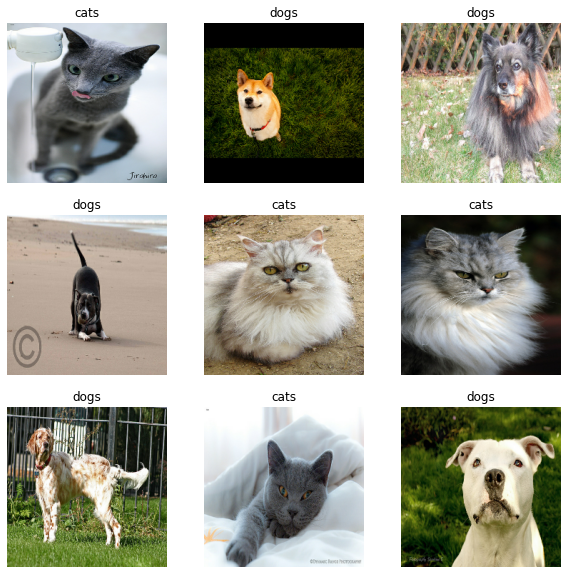

In [4]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [6]:
num_classes = 1
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [7]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2021-12-30 23:00:59.369597: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301
2021-12-30 23:00:59.857950: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 15/185 [=>............................] - ETA: 5s - loss: 0.7388 - binary_accuracy: 0.5938

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


141/185 [=====================>........] - ETA: 1s - loss: 0.6203 - binary_accuracy: 0.6636- ETA: 4s - loss: 0.6528 - binary_acc - ETA: 3s - loss: 0.6426 - binary_ac - ETA: 2s - loss: 0.6297 - binary_accuracy: 0. - ETA: 2s - loss: 0.6277 - binary_accuracy: 0.66 - ETA: 1s - loss: 0.6272 - binary_accuracy:

Corrupt JPEG data: premature end of data segment


185/185 [==============================] - 10s 40ms/step - loss: 0.6099 - binary_accuracy: 0.6641 - val_loss: 0.5331 - val_binary_accuracy: 0.7240
Epoch 2/10
185/185 [==============================] - 6s 34ms/step - loss: 0.5319 - binary_accuracy: 0.7256 - val_loss: 0.5330 - val_binary_accuracy: 0.7375
Epoch 3/10
185/185 [==============================] - 6s 33ms/step - loss: 0.4899 - binary_accuracy: 0.7564 - val_loss: 0.4860 - val_binary_accuracy: 0.7645
Epoch 4/10
185/185 [==============================] - 6s 34ms/step - loss: 0.4322 - binary_accuracy: 0.7943 - val_loss: 0.4852 - val_binary_accuracy: 0.7760
Epoch 5/10
185/185 [==============================] - 6s 34ms/step - loss: 0.3495 - binary_accuracy: 0.8495 - val_loss: 0.5868 - val_binary_accuracy: 0.7835
Epoch 6/10
185/185 [==============================] - 6s 34ms/step - loss: 0.2725 - binary_accuracy: 0.8808 - val_loss: 0.6670 - val_binary_accuracy: 0.7821
Epoch 7/10
185/185 [==============================] - 6s 33ms/step -

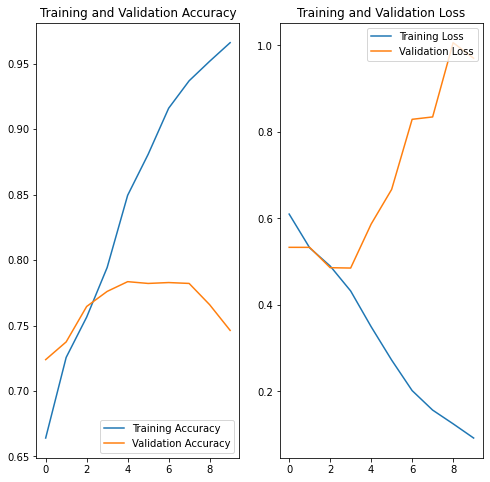

In [9]:
def plotTrainingGraphs(history, epochs):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()


plotTrainingGraphs(history, epochs)



In [24]:
# Reference: https://towardsdatascience.com/batch-normalization-in-practice-an-example-with-keras-and-tensorflow-2-0-b1ec28bde96f

num_classes = 1
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [25]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
185/185 [==============================] - 7s 34ms/step - loss: 0.6270 - binary_accuracy: 0.6690 - val_loss: 0.6186 - val_binary_accuracy: 0.6955
Epoch 2/10
185/185 [==============================] - 6s 33ms/step - loss: 0.5197 - binary_accuracy: 0.7336 - val_loss: 0.6011 - val_binary_accuracy: 0.7145
Epoch 3/10
185/185 [==============================] - 6s 33ms/step - loss: 0.4474 - binary_accuracy: 0.7879 - val_loss: 0.5030 - val_binary_accuracy: 0.7639
Epoch 4/10
185/185 [==============================] - 6s 33ms/step - loss: 0.3561 - binary_accuracy: 0.8361 - val_loss: 0.6606 - val_binary_accuracy: 0.7152
Epoch 5/10
185/185 [==============================] - 6s 32ms/step - loss: 0.2767 - binary_accuracy: 0.8853 - val_loss: 0.7755 - val_binary_accuracy: 0.7212
Epoch 6/10
185/185 [==============================] - 6s 33ms/step - loss: 0.2221 - binary_accuracy: 0.9131 - val_loss: 0.6501 - val_binary_accuracy: 0.7449
Epoch 7/10
185/185 [==============================] - 6s 3

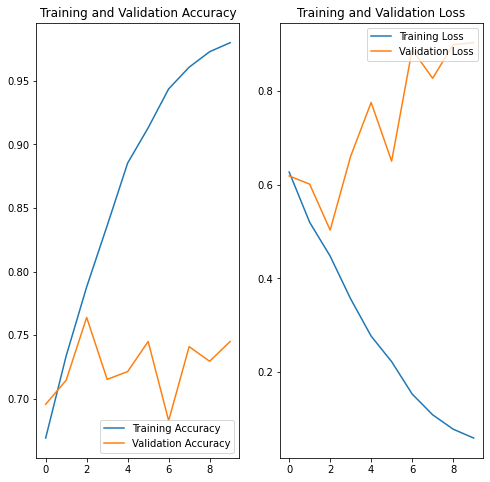

In [26]:
plotTrainingGraphs(history, epochs)
